In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/HomeworkIV' 

In [4]:
import sys
sys.path.append(path)

In [5]:
from functions import *

# **1. Implementing your own Shazam**

In [ ]:
matches_dict = handle_q_1()

In [7]:
input_track = input('Digit a track number to Shazam: ')
print_matching(input_track, matches_dict)

Digit a track number to Shazam: 8


# **2. Grouping songs together!**


### **2.1 Getting your data!**
#### Load datasets and get a preview.


In [ ]:
echonest = pd.DataFrame(pd.read_csv(path+"/dataset_csv/echonest.csv", sep = ','))
pd.set_option("display.max_rows", None, "display.max_columns", None)
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 250 entries, track_id to temporal_features_223
dtypes: float64(244), int64(1), object(5)
memory usage: 25.0+ MB


This first dataset contains 250 features.

In [ ]:
features = pd.DataFrame(pd.read_csv(path+"/dataset_csv/features.csv", sep = ','))
features.head()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Columns: 519 entries, track_id to zcr_std_01
dtypes: float64(518), int64(1)
memory usage: 422.0 MB


The second dataset consists of 519 coloumns.

In [ ]:
tracks =  pd.DataFrame(pd.read_csv(path + "/dataset_csv/tracks.csv", sep = ','))

In [ ]:
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,album_title,album_tracks,album_type,artist_active_year_begin,artist_active_year_end,artist_associated_labels,artist_bio,artist_comments,artist_date_created,artist_favorites,artist_id,artist_latitude,artist_location,artist_longitude,artist_members,artist_name,artist_related_projects,artist_tags,artist_website,artist_wikipedia_page,set_split,set_subset,track_bit_rate,track_comments,track_composer,track_date_created,track_date_recorded,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [ ]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_information         83149 non-null   object 
 8   album_listens             106574 non-null  int64  
 9   album_producer            18060 non-null   object 
 10  album_tags                106574 non-null  object 
 11  album_title               105549 non-null  object 
 12  album_tracks              106574 non-null  int64  
 13  album_type                100066 non-null  o

Finally, the last dataset contains 53 columns.

The first step of the preprocessing of our datasets deals NaN values. Specifically we are going to replace NaN with an empty string if the column's type is *string*, while if the column's type is *numeric* we are going to replace NaN values with the mean of that column (that's a procedure of imputation of missing values).


Now apply the *remove_NaN_values* function to our datasets.

In [ ]:
remove_NaN_values(echonest)
remove_NaN_values(features)
remove_NaN_values(tracks)

### **2.2 Choose your features (variables)!**


Since the large number of features which we are dealing with, we need to reduce the dimentionality of our datasets. Among the different kind of procedures that exist for this purpose, we chose to perform the Principal Component Analysis (PCA) on these three datasets 

Since PCA is able to deal only with numeric variables, we need firstly to remove all the object column.

In [ ]:
echonest_cleaned = remove_object_col(echonest)
features_cleaned = remove_object_col(features)
tracks_cleaned = remove_object_col(tracks)

Now these datasets should not have object type columns anymore. Let's control!
 

In [ ]:
echonest_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 245 entries, track_id to temporal_features_223
dtypes: float64(244), int64(1)
memory usage: 24.5 MB


In [ ]:
features_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Columns: 519 entries, track_id to zcr_std_01
dtypes: float64(518), int64(1)
memory usage: 422.0 MB


In [ ]:
tracks_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          106574 non-null  int64  
 1   album_comments    106574 non-null  int64  
 2   album_favorites   106574 non-null  int64  
 3   album_id          106574 non-null  int64  
 4   album_listens     106574 non-null  int64  
 5   album_tracks      106574 non-null  int64  
 6   artist_comments   106574 non-null  int64  
 7   artist_favorites  106574 non-null  int64  
 8   artist_id         106574 non-null  int64  
 9   artist_latitude   106574 non-null  float64
 10  artist_longitude  106574 non-null  float64
 11  track_bit_rate    106574 non-null  int64  
 12  track_comments    106574 non-null  int64  
 13  track_duration    106574 non-null  int64  
 14  track_favorites   106574 non-null  int64  
 15  track_interest    106574 non-null  int64  
 16  track_listens     10

Therefore an important step that we need to do in the preprocessing of the data is to scale our variables. 
We decided to use a standard method to scale: we applied the following transformation to each feature. $$\frac{X - \mathbb E(X)}{sd(X)}$$  


This operation has to be done before applying PCA in order to have all the summaries of variables (such as variance, mean) in the same scale such that it avoids to give more importace to the feature with a large unit of measure (mostly dealing with variances that are squared measures).


In [ ]:
 echonest_final = scaling_features(echonest_cleaned)
 features_final = scaling_features(features_cleaned)
 tracks_final = scaling_features(tracks_cleaned)

Now we are ready compute the Principal Component Analysis on our cleaned datasets.

In this analysis we would like that our components explain at least 70% of the total variance. Thus, we select the number of components that fulfils about 75% of the variance.





1) For **echonest_final**.

In [ ]:
# Set number of components equal to the min(n_sample, n_features)
pca_echonest = PCA(n_components = echonest_final.shape[1]-1)
# we need to exclude as always the trak_id column (the first one)
echonest_fit = pca_echonest.fit_transform(echonest_final[echonest_final.columns[1:]])

In [ ]:
# let's choose the number of components
n_components_echonest = number_of_components(pca_echonest)
print('We select {} components.'.format(n_components_echonest))
ratio = round(np.cumsum(pca_echonest.explained_variance_ratio_)[n_components_echonest],3)
print('The ratio of variance explained by {} components is equal to {}.'.format(n_components_echonest, ratio))

We select 43 components.
The ratio of variance explained by 43 components is equal to 0.758.


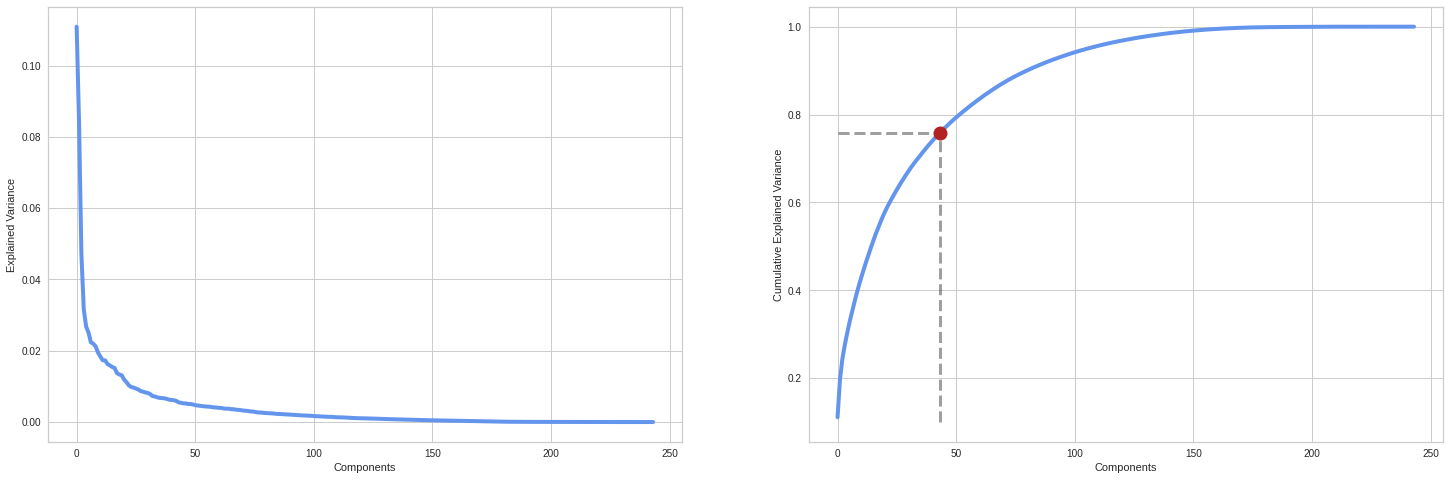

In [ ]:
plt.figure(figsize = (25,8))
plt.subplot(121) 

plt.plot(pca_echonest.explained_variance_ratio_, lw = 4, color = 'cornflowerblue')
plt.ylabel('Explained Variance')
plt.xlabel('Components')

plt.subplot(122) 
plt.plot(np.cumsum(pca_echonest.explained_variance_ratio_), lw = 4, color = 'cornflowerblue')
plt.plot( [n_components_echonest, n_components_echonest],[0.1, np.cumsum(pca_echonest.explained_variance_ratio_)[n_components_echonest] ], 'k--', lw=3, alpha = .4)
plt.plot( [0, n_components_echonest],[np.cumsum(pca_echonest.explained_variance_ratio_)[n_components_echonest], np.cumsum(pca_echonest.explained_variance_ratio_)[n_components_echonest]  ], 'k--',lw=3, alpha = .4)
plt.plot(n_components_echonest, np.cumsum(pca_echonest.explained_variance_ratio_)[n_components_echonest], marker="o", markersize=14, markerfacecolor="firebrick")
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Components')
plt.show()

The PCA suggests that 43 features over 245 explain about 75% of the total variance of the original dataframe. Thus we are goint to pick the first 43 principal components of our fitted dataframe and collect them in a new reduced dataset. 

In [ ]:
# Get the reduced dataframe of echonest
echonest_pca = pd.DataFrame(echonest_fit).iloc[: , :n_components_echonest+1]
echonest_pca.head()

# Add the track_id column 
echonest_pca = pd.concat([echonest['track_id'], echonest_pca], axis = 1)
echonest_pca.head()


,track_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,2,0.779179,-1.709530,0.070459,0.467926,-1.452836,1.097065,-1.332291,0.347357,-0.606134,-2.242456,-2.061693,-0.369667,0.008240,-0.407305,2.173059,1.890471,-2.349576,-0.742846,1.319750,-0.044123,-0.121125,-0.271972,0.442785,-0.866409,-0.394863,-0.381067,1.472326,0.742610,0.653070,-1.011452,1.231696,-0.284111,-0.188597,0.628824,-0.078442,0.595426,0.588725,1.006453,-0.839268,-0.379458,0.074266,0.342754,-0.397679,-0.142231
1,3,2.659287,-4.168144,2.407970,-0.459523,0.069098,0.061430,1.349500,1.108530,-1.363281,-3.273057,1.941299,0.199835,-0.356914,0.712969,0.075209,1.602292,-0.903072,-2.269847,0.781922,-0.939840,-0.422234,0.594027,-1.132485,-2.355493,1.801608,-2.329359,0.217219,0.923462,0.241510,-0.452285,0.291726,-0.113644,-0.524821,0.952815,-1.153474,0.709235,-0.435411,0.297877,-0.659738,-0.238727,-0.414126,0.425127,-0.232275,0.333078
2,5,1.375855,-4.540359,2.340127,-0.065456,-0.875937,0.718881,1.770003,0.271952,0.766449,-2.434843,0.417441,0.604973,1.249945,1.580567,0.097240,-0.285143,-0.813276,-1.606913,-0.861208,0.653136,0.045919,0.395187,-0.464531,-0.438713,-0.382054,-0.763985,0.108414,-0.290570,0.090038,-0.860390,0.860090,0.944907,-0.638466,2.257752,-1.192022,-0.033558,0.143275,-1.109203,-0.708740,-0.662151,-0.694425,0.092791,-0.909050,0.913563
3,10,6.612744,-1.134203,0.394951,1.016476,1.060525,0.308417,-2.942922,0.637882,2.171798,-3.671699,0.611497,-1.564584,0.977231,1.370250,-3.752788,-1.808015,-6.902008,-2.069784,4.845807,-1.041741,-0.313615,-0.367945,0.341144,-0.080255,-1.563509,-1.381809,0.377771,-3.742981,3.868553,2.684884,-0.362339,-2.465255,1.197628,-0.844211,-0.194677,-0.560488,-0.082658,-0.083749,0.286656,-0.547350,2.352459,1.744780,-1.979573,0.416892
4,134,-2.917268,-5.523874,2.751435,-0.619106,0.590182,0.819080,0.538877,-0.309097,-0.320412,0.632527,1.333743,1.504330,0.170079,0.280747,0.340657,-0.943388,-0.720430,-1.098837,1.632813,2.710618,0.748106,0.595294,-1.040075,0.531471,-0.249545,-3.179066,-0.769689,-0.034062,-0.893913,-0.387423,0.938915,-0.668889,0.116543,0.141360,-0.978146,0.457348,-1.422614,1.215031,-2.362589,-1.576363,-0.313161,0.236728,-0.388360,0.919006


2) For **features_final**

In [ ]:
# Set number of components equal to the min(n_sample, n_features)
pca_features = PCA(features_final.shape[1]-1)
# we need to exclude as always the trak_id column (the first one)
features_fit = pca_features.fit_transform(features_final[features_final.columns[1:]])

In [ ]:
# let's choose the number of components
n_components_features = number_of_components(pca_features)
print('We select {} components.'.format(n_components_features))
ratio = round(np.cumsum(pca_features.explained_variance_ratio_)[n_components_features],3)
print('The ratio of variance explained by {} components is equal to {}.'.format(n_components_features, ratio))

We select 65 components.
The ratio of variance explained by 65 components is equal to 0.756.


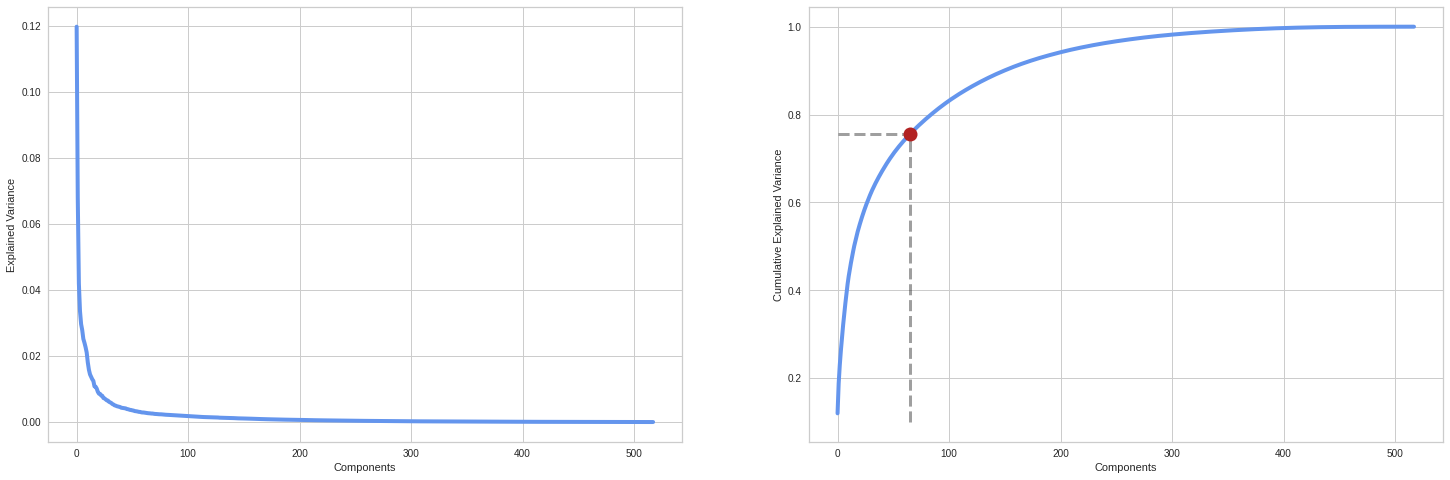

In [ ]:
plt.figure(figsize = (25,8))
plt.subplot(121) 

plt.plot(pca_features.explained_variance_ratio_, lw = 4, color = 'cornflowerblue')
plt.ylabel('Explained Variance')
plt.xlabel('Components')

plt.subplot(122)
plt.plot(np.cumsum(pca_features.explained_variance_ratio_), lw = 4 ,color = 'cornflowerblue')
plt.plot( [n_components_features, n_components_features],[0.1, np.cumsum(pca_features.explained_variance_ratio_)[n_components_features] ], 'k--', lw=3, alpha = .4)
plt.plot( [0, n_components_features],[np.cumsum(pca_features.explained_variance_ratio_)[n_components_features], np.cumsum(pca_features.explained_variance_ratio_)[n_components_features]  ], 'k--', lw=3 , alpha = .4)
plt.plot(n_components_features, np.cumsum(pca_features.explained_variance_ratio_)[n_components_features], marker="o", markersize=14, markerfacecolor="firebrick")
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Components')
plt.show()

From the previous analysis we are going to define a reduced dataframe with only 65 components that are able to explain about 75% of the total variance of the complete dataframe which contains 519 features. 

In [ ]:
# Get the reduced dataframe of features
features_pca = pd.DataFrame(features_fit).iloc[: , :n_components_features+1]
features_pca.head()

# Add the track_id column 
features_pca = pd.concat([features['track_id'], features_pca], axis = 1)
features_pca.head()


,track_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,2,2.060070,-3.089439,-5.565923,0.080540,2.309270,-3.597832,-5.054209,-0.889464,-5.108313,-4.067441,3.572938,-1.159990,-2.207847,-1.590584,0.223469,0.433007,-1.436558,1.154625,-0.077387,1.605499,-1.225731,-0.316250,0.250172,-2.847029,0.360655,-3.041298,0.892076,1.449698,-0.321163,0.564567,1.440019,-0.743921,-0.548346,-0.478788,-0.800454,0.595390,1.367694,-0.865034,-0.115469,0.701893,-2.255730,0.352275,-1.812992,-0.385806,-1.353177,-0.144009,-0.795262,1.588618,0.892265,1.317769,0.642182,0.212810,-2.414210,-0.259431,-1.202871,-0.666393,-0.854805,0.564863,-0.246543,1.479843,0.964800,-1.064315,-0.524817,0.350775,-0.950206,0.658981
1,3,3.509246,-5.384927,-4.332572,-1.113460,-3.068300,2.204037,-0.234569,4.726578,-0.604041,-3.417902,2.969570,0.127854,-0.722160,0.904164,-1.056876,-2.531507,-0.230250,0.510513,-2.259663,0.534653,-0.161708,-1.717528,1.427582,-3.051052,0.573445,-2.698419,-0.714682,1.074101,-0.859668,2.312505,-0.855573,0.707546,0.354507,-1.060272,1.844368,-1.362443,2.580939,-1.632471,1.159818,0.914117,-1.623623,1.195638,-0.955477,0.405992,-0.122113,0.697013,-0.585097,2.636847,-0.177606,-0.153928,0.487278,-0.944026,-0.269824,-0.219592,-0.308430,1.191343,-0.244326,-0.305088,-0.491975,-0.254035,-0.107174,0.659033,1.088034,-1.430581,-0.956412,-0.679251
2,5,0.954593,-3.178022,-3.494718,-0.934800,-1.098688,0.455750,-2.390566,1.266916,0.985001,-1.733520,2.806514,-2.365280,-0.655932,0.470489,0.112723,-0.440214,-1.329598,0.536812,0.613815,2.531022,0.213038,-0.983676,-0.159938,-2.368912,-3.419339,-1.974347,2.764438,1.807662,-1.772858,-0.106143,2.107336,0.077253,-0.829437,-0.471847,2.604790,0.328109,0.566734,-1.895733,1.725603,1.045803,-0.848437,0.523569,-0.615561,0.542990,-1.050345,0.036632,-1.478038,1.834811,-0.275641,2.037614,0.138669,-0.567221,-3.661532,-1.015774,-0.587955,1.257611,-0.222195,0.687578,-1.421917,0.121906,0.137209,0.449652,-0.820845,-0.985619,-0.739386,1.057788
3,10,6.695430,1.329784,-5.129153,-0.915313,-2.155916,-0.120454,0.072621,3.904953,0.213868,-2.841647,1.364953,1.260873,0.323507,2.791101,2.677146,-1.369212,-0.696572,0.325820,-0.943323,1.015017,-2.506290,-2.761328,0.190591,0.912299,-1.293208,0.417755,-0.336510,-2.035364,3.589013,-1.083368,2.753534,1.246875,0.050735,1.078600,2.261801,0.200077,1.084182,0.234084,2.954903,0.206754,-0.037722,-0.153328,0.113327,0.843546,-0.054427,-0.498017,-0.674816,-1.253862,-0.908248,-0.973399,-1.140221,-1.407585,-1.075025,-0.685425,-0.217872,-1.023667,0.810760,1.312544,0.519809,-0.520082,0.264321,-0.222702,-0.493442,-0.970906,-1.524272,-0.419920
4,20,0.870800,-1.123613,2.985175,-0.830491,-2.443379,4.542687,-0.159431,-1.837118,1.026206,-2.033920,-0.940295,-2.119117,1.312825,5.708031,-0.101215,0.445861,1.724467,-0.290227,0.503632,-1.364637,1.843659,1.081822,1.090737,0.447308,1.157101,1.097130,-1.372946,1.356532,1.129801,0.238177,-1.081960,-1.342903,0.115791,-1.200921,0.533756,-1.740978,0.746127,-2.422150,-1.195532,1.322819,0.255863,2.031239,-0.617361,-1.745593,-0.134674,-0.460643,-0.503801,-0.530340,-0.390840,1.039385,-0.157377,0.226506,-0.603802,-0.856919,-0.166840,0.535788,-0.099273,-1.080375,0.967049,-0.739837,-0.641651,-0.205244,0.552472,0.639427,-0.857951,0.169048


3) For **tracks_final**

In [ ]:
# Set number of components equal to the min(n_sample, n_features)
pca_tracks = PCA(n_components=tracks_final.shape[1]-1)
# we need to exclude as always the trak_id column (the first one)
tracks_fit = pca_tracks.fit_transform(tracks_final[tracks_final.columns[1:]])


In [ ]:
# let's choose the number of components
n_components_tracks = number_of_components(pca_tracks)
print('We select {} components.'.format(n_components_tracks))
ratio = round(np.cumsum(pca_tracks.explained_variance_ratio_)[n_components_tracks],3)
print('The ratio of variance explained by {} components is equal to {}.'.format(n_components_tracks, ratio))

We select 6 components.
The ratio of variance explained by 6 components is equal to 0.761.


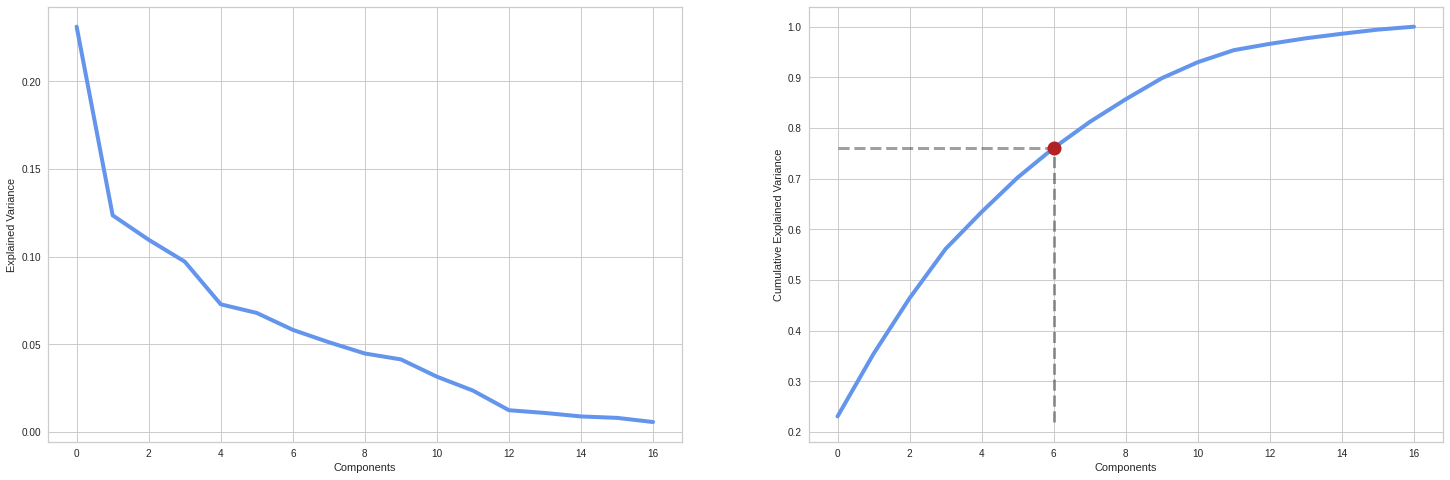

In [ ]:
plt.figure(figsize = (25,8))
plt.subplot(121) 

plt.plot(pca_tracks.explained_variance_ratio_, lw = 4, color = 'cornflowerblue')
plt.ylabel('Explained Variance')
plt.xlabel('Components')

plt.subplot(122)
plt.plot(np.cumsum(pca_tracks.explained_variance_ratio_), lw = 4, color = 'cornflowerblue' )
plt.plot( [n_components_tracks, n_components_tracks],[0.22, np.cumsum(pca_tracks.explained_variance_ratio_)[n_components_tracks] ], 'k--', lw=3, alpha = .4)
plt.plot( [0, n_components_tracks],[np.cumsum(pca_tracks.explained_variance_ratio_)[n_components_tracks], np.cumsum(pca_tracks.explained_variance_ratio_)[n_components_tracks]  ], 'k--', lw=3, alpha = .4)
plt.plot(n_components_tracks, np.cumsum(pca_tracks.explained_variance_ratio_)[n_components_tracks],marker="o", markersize=14, markerfacecolor="firebrick")
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Components')
plt.show()

Finally we got a dimentional reduction of the last dataframe *tracks*. PCA suggests to select 6 principal components over 16 that explain 75% of the total variance.

In [ ]:
# Get the reduced dataframe of tracks
tracks_pca = pd.DataFrame(tracks_fit).iloc[: , :n_components_tracks+1]
tracks_pca.head()

# Add the track_id column 
tracks_pca = pd.concat([tracks['track_id'], tracks_pca], axis = 1)
tracks_pca.head()


,track_id,0,1,2,3,4,5,6
0,2,-0.038587,1.911460,-1.870923,0.245750,0.321816,0.177452,-0.346858
1,3,-0.183219,1.853615,-1.926866,0.182039,0.322818,0.169584,-0.114913
2,5,0.017389,1.870210,-1.868793,0.276132,0.457772,0.122879,-0.212297
3,10,9.329484,5.045873,1.800341,4.140818,2.255580,-0.721875,-0.493435
4,20,-0.395731,1.717042,-1.659676,0.186153,0.173279,-0.246754,0.293440


In order to get a more complete final dataset, we need to select some meaningful variables from the *tracks* dataframe.

We chose the following variables to have a more detailed description of the tracks:
- track_title
- album_title
- artist_name
- track_duration
- track_language_code
-track_genre_top
- track_license





In [ ]:
selected_variables_df = tracks[['track_id', 'track_title', 'album_title','artist_location', 'artist_name','track_duration', 'track_language_code', 'track_genre_top', 'track_license']]
selected_variables_df.head()

,track_id,track_title,album_title,artist_location,artist_name,track_duration,track_language_code,track_genre_top,track_license
0,2,Food,AWOL - A Way Of Life,New Jersey,AWOL,168,en,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...
1,3,Electric Ave,AWOL - A Way Of Life,New Jersey,AWOL,237,en,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...
2,5,This World,AWOL - A Way Of Life,New Jersey,AWOL,206,en,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...
3,10,Freeway,Constant Hitmaker,,Kurt Vile,161,en,Pop,Attribution-NonCommercial-NoDerivatives (aka M...
4,20,Spiritual Level,Niris,Colchester England,Nicky Cook,311,en,,Attribution-NonCommercial-NoDerivatives (aka M...


Now we can merge all together the three reduced dataframe obtained from the PCA and the dataframe with the selected variables.

The new dataframe contains only 125 features!

In [ ]:
merge_1 = selected_variables_df.merge(echonest_pca, on = "track_id")
merge_2 = merge_1.merge(features_pca, on = "track_id")
merged_df = merge_2.merge(tracks_pca, on = "track_id")

print(merged_df.shape)
merged_df.head()

(13129, 126)


,track_id,track_title,album_title,artist_location,artist_name,track_duration,track_language_code,track_genre_top,track_license,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,39_x,40_x,41_x,42_x,43_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,30_y,31_y,32_y,33_y,34_y,35_y,36_y,37_y,38_y,39_y,40_y,41_y,42_y,43_y,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,0,1,2,3,4,5,6
0,2,Food,AWOL - A Way Of Life,New Jersey,AWOL,168,en,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...,0.779179,-1.709530,0.070459,0.467926,-1.452836,1.097065,-1.332291,0.347357,-0.606134,-2.242456,-2.061693,-0.369667,0.008240,-0.407305,2.173059,1.890471,-2.349576,-0.742846,1.319750,-0.044123,-0.121125,-0.271972,0.442785,-0.866409,-0.394863,-0.381067,1.472326,0.742610,0.653070,-1.011452,1.231696,-0.284111,-0.188597,0.628824,-0.078442,0.595426,0.588725,1.006453,-0.839268,-0.379458,0.074266,0.342754,-0.397679,-0.142231,2.060070,-3.089439,-5.565923,0.080540,2.309270,-3.597832,-5.054209,-0.889464,-5.108313,-4.067441,3.572938,-1.159990,-2.207847,-1.590584,0.223469,0.433007,-1.436558,1.154625,-0.077387,1.605499,-1.225731,-0.316250,0.250172,-2.847029,0.360655,-3.041298,0.892076,1.449698,-0.321163,0.564567,1.440019,-0.743921,-0.548346,-0.478788,-0.800454,0.595390,1.367694,-0.865034,-0.115469,0.701893,-2.255730,0.352275,-1.812992,-0.385806,-1.353177,-0.144009,-0.795262,1.588618,0.892265,1.317769,0.642182,0.212810,-2.414210,-0.259431,-1.202871,-0.666393,-0.854805,0.564863,-0.246543,1.479843,0.964800,-1.064315,-0.524817,0.350775,-0.950206,0.658981,-0.038587,1.911460,-1.870923,0.245750,0.321816,0.177452,-0.346858
1,3,Electric Ave,AWOL - A Way Of Life,New Jersey,AWOL,237,en,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...,2.659287,-4.168144,2.407970,-0.459523,0.069098,0.061430,1.349500,1.108530,-1.363281,-3.273057,1.941299,0.199835,-0.356914,0.712969,0.075209,1.602292,-0.903072,-2.269847,0.781922,-0.939840,-0.422234,0.594027,-1.132485,-2.355493,1.801608,-2.329359,0.217219,0.923462,0.241510,-0.452285,0.291726,-0.113644,-0.524821,0.952815,-1.153474,0.709235,-0.435411,0.297877,-0.659738,-0.238727,-0.414126,0.425127,-0.232275,0.333078,3.509246,-5.384927,-4.332572,-1.113460,-3.068300,2.204037,-0.234569,4.726578,-0.604041,-3.417902,2.969570,0.127854,-0.722160,0.904164,-1.056876,-2.531507,-0.230250,0.510513,-2.259663,0.534653,-0.161708,-1.717528,1.427582,-3.051052,0.573445,-2.698419,-0.714682,1.074101,-0.859668,2.312505,-0.855573,0.707546,0.354507,-1.060272,1.844368,-1.362443,2.580939,-1.632471,1.159818,0.914117,-1.623623,1.195638,-0.955477,0.405992,-0.122113,0.697013,-0.585097,2.636847,-0.177606,-0.153928,0.487278,-0.944026,-0.269824,-0.219592,-0.308430,1.191343,-0.244326,-0.305088,-0.491975,-0.254035,-0.107174,0.659033,1.088034,-1.430581,-0.956412,-0.679251,-0.183219,1.853615,-1.926866,0.182039,0.322818,0.169584,-0.114913
2,5,This World,AWOL - A Way Of Life,New Jersey,AWOL,206,en,Hip-Hop,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1.375855,-4.540359,2.340127,-0.065456,-0.875937,0.718881,1.770003,0.271952,0.766449,-2.434843,0.417441,0.604973,1.249945,1.580567,0.097240,-0.285143,-0.813276,-1.606913,-0.861208,0.653136,0.045919,0.395187,-0.464531,-0.438713,-0.382054,-0.763985,0.108414,-0.290570,0.090038,-0.860390,0.860090,0.944907,-0.638466,2.257752,-1.192022,-0.033558,0.143275,-1.109203,-0.708740,-0.662151,-0.694425,0.092791,-0.909050,0.913563,0.954593,-3.178022,-3.494718,-0.934800,-1.098688,0.455750,-2.390566,1.266916,0.985001,-1.733520,2.806514,-2.365280,-0.655932,0.470489,0.112723,-0.440214,-1.329598,0.536812,0.613815,2.531022,0.213038,-0.983676,-0.159938,-2.368912,-3.419339,-1.974347,2.764438,1.807662,-1.772858,-0.106143,2.107336,0.077253,-0.829437,-0.471847,2.604790,0.328109,0.566734,-1.895733,1.725603,1.

Save this final dataset in our directory!

In [ ]:
merged_df.to_csv(path+'/dataset_final.csv')

### **2.3 Clustering!**



#### 1) Implementation of the K-means clustering algorithm

After then we preprocessed our dataset and apply a dimensional reduction with PCA we can proceed to cluster analysis.


Load my dataframe

In [ ]:
merged_df = pd.read_csv(path+'/dataset_final.csv')

Also in this analysis we need to remove all non-numeric features in order to apply a clustering algorithm, called k-means which is based on centroids of clusters

In [ ]:
data = remove_object_col(merged_df)

#### 2) Find the optimal number of clusters with 3 different methods

One of the main step in a cluster analysis is to decide in how many cluster the data points should be divided. So we have to choose the most suitable number of cluster. 
There are many different methods to do it. 
Let's go for two of them.

1. **Elbow method**: it is a heuristic method that consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

2. **Gap statistic**: it compares the withiness-variance for different values of k with their expected values under uniform distribution of the data. 
We set: 
  - $W_k$  the withiness-variance for k cluster for our data
  - $W_{kb}^*$ the withiness-variance for k cluster for randomized data

  Then we can define the gap statistic as $G(k) = \frac{1}{B} \sum_b \log(W_{kb}^*) - \log ( W_k) $. We shoud choose the best k which is equal to the minimum k such that $G(k) \geq G(k+1) - s_{k+1}$, where $s_k = \sigma_k \cdot \sqrt(1+ \frac{1}{B}) $.

3. **Dendrogram**: it is a visual method to determin the best number of clusters among our data. Specifically we need to identify the largest vertical difference between nodes, and in the middle pass an horizontal line. The number of vertical lines intersecting it is the optimal number of cluster.

*Elbow Method*

  0%|          | 0/13 [00:00<?, ?it/s]

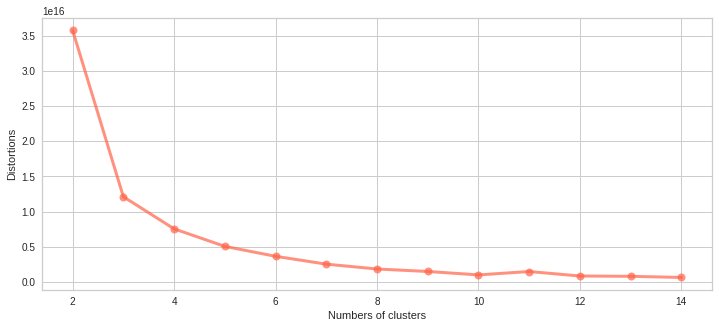

In [ ]:
Elbow_scratch(data, range(2,15))

*Gap Statistic Curve*

  0%|          | 0/13 [00:00<?, ?it/s]

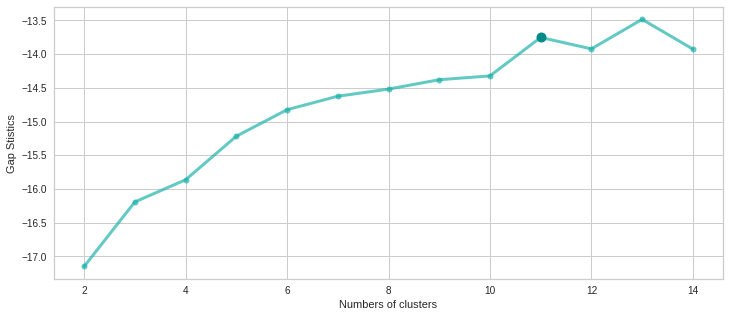

In [ ]:
k_star = gap_stat(data, 15)

In [ ]:
k_star

11

*Dendrogram*

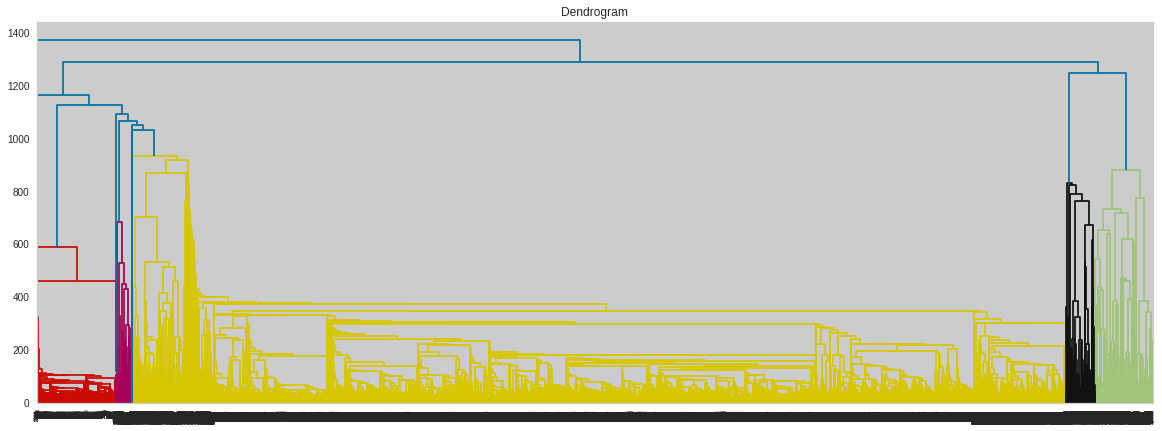

In [ ]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data, method='single', metric='euclidean'))

As we expected, different methods to determine the best number of clusters suggest different solutions. 
- Elbow Method suggest to select 6 or 7 custers;
- Gap Statistic suggestst to pick 11 clusters;
- Dendrogram (Hierarchical Clustering) suggests 5.

As a result, we may decide to choose 6 clusters to implement our k-means algorithm since 2 over 3 procedures suggest a value of k around that.


#### 3) Run the algorithm on the data that you got from the dimensionality reduction

In [ ]:
clusters, distance_matrix, clus = kmeans_scratch(6, data)

Test the accuracy of our clustering with the classification in different genres of the original dataset.
We use the Adjusted Rand Index to evaluate it which is a measure of the similarity between two data clusterings. 


In [ ]:
# drop labels at the NA-index in the dataframe and store our clustering
index_NA = merged_df.loc[pd.isna(merged_df["track_genre_top"]), :].index
labels = [clusters[i]  for i in range(len(clusters)) if not i in index_NA ]
# Store the true classification of the datta points
genre_track = merged_df['track_genre_top'].dropna()
dummies = pd.get_dummies(genre_track)
numeric_genre_track = dummies.values.argmax(axis = 1)

In [ ]:
# compute the Adjusted Rand Index
ari = round(metrics.rand_score(numeric_genre_track, labels)*100,2)
print('The goodness of our classification is about {}%.'.format(ari))

The goodness of our classification is about 64.41%.


#### 4) K means with the library

Apply K-means++ with 7 number of cluster and evaluate the Adjusted Rand Index.

In [ ]:
kmeans_plus = KMeans(n_clusters=6, init='k-means++',random_state=42).fit(data)

In [ ]:
labels_kmeans_plus = [kmeans_plus.labels_[i]  for i in range(len(kmeans_plus.labels_)) if not i in index_NA ]

In [ ]:
ari_plus = round(metrics.rand_score(numeric_genre_track, labels_kmeans_plus)*100,2)
print('The goodness of our classification is about {}%.'.format(ari_plus))

The goodness of our classification is about 65.45%.


Evaluate the best number of clusters with k-means++ algorithm.

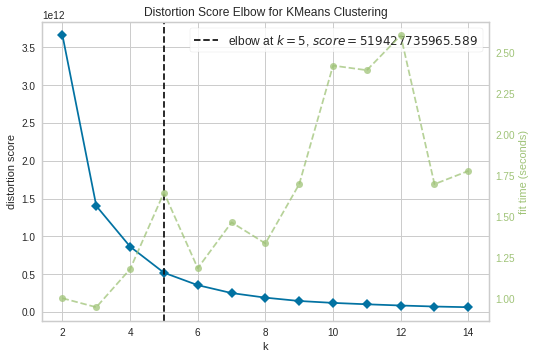

In [ ]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(n_clusters=15, init='k-means++').fit(data), k=(2,15))
visualizer.fit(data) # Fit the data to the visualizer
visualizer.show();

Let's compare what we got from the two algorithms, the first one which we had implemented from scratch and the second one from the *sklearn* library.
Fixed the number of cluster equal to 7, both of them lead to a value of Adjusted Rand Index about 65%, specifically 64.41% for the first one and 65.45% for the k-means++. That are pretty good results and k-means++ seems to be a little bit better the the first one.  

In addition also the Elbow Curves are similar since they suggest close number of clusters, as we can see from the due Elbow plots. As we said before the first one suggests to select 6 or 7 clusters, while from k-means++ we would pick 5 clusters (in the figure above).

### **2.4 Analysing your results!**




#### Characterizing Clusters

In [ ]:
merged_df.insert(1,"cluster", clusters) #insert a new column with the number of clusters for each track  

In order to build the pivot table we chose some meaningful variables from our original datasets. In particular we selected them from *echonest* and from *tracks*:

- *audio_features_acousticness*
- *audio_features_danceability*
- *audio_features_energy*	
- *audio_features_instrumentalness*
- *track_duration*
- *track_genre_top*
-	track_language

Moreover we decided to discretize numeric variables so we transformed them in categorial features with 4 classes:
1. *Low* (0 - 25%)
2. *Medium-Low* (25% - 50%)
3. *Medium-High* (50% - 75%)
4. *High* (75% - 100%)

Finally we simplified the variable *track_language* into a categorical variable with less classes based on the occurrence of each class. Thus, now it has only only 4 classe: *'English'*, *'Spanish'*, *'French'* and *'Other'*. 

In [ ]:
np.seterr(divide='ignore', invalid='ignore') #used to ignore math error into operation pivot

In [ ]:
pivot = Pivot(echonest, tracks, merged_df, clusters)

In [ ]:
pivot.head()

,Clusters,track_duration,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,track_genre_top,track_language
0,2,2,2,3,3,1,Hip-Hop,en
1,2,3,2,3,4,1,Hip-Hop,en
2,2,2,1,4,3,1,Hip-Hop,en
3,2,2,4,3,4,4,Pop,en
4,2,2,2,3,3,1,,en


In [ ]:
pivot_duration = PivotDuration(pivot)
pivot_duration

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Low,22.45,25.28,27.81,30.06,24.30,18.87
Medium-Low,22.98,26.59,27.27,24.52,26.37,24.94
Medium-High,25.31,27.09,24.51,20.29,24.01,30.67
High,29.27,21.04,20.42,25.13,25.31,25.53
Tot,100.01,100.00,100.01,100.00,99.99,100.01


The distribution of the variable that contains the duration of the song seems uniformly distributed in the double contingency table. 

In addition, if we observe specifilally we can state that *medium-high* prevails in cluster 6, then in custer 4 low duration is more slightly frequent, while cluster 1 mainly contains data points with *high* duration. 

In [ ]:
pivot_audio_features_acousticness	 = pivotAcousticness(pivot)
pivot_audio_features_acousticness	

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Low,32.78,50.37,33.36,17.69,28.36,60.91
Medium-Low,13.01,12.92,12.28,10.34,11.74,12.97
Medium-High,14.76,10.42,12.32,14.04,13.82,10.53
High,39.45,26.28,42.05,57.92,46.08,15.59
Tot,100.00,99.99,100.01,99.99,100.00,100.00


The table above describe how the feature that measures the *acousticness* of the songs vary in different custers. We can say that *medium-low*  and *medium-high* levels of *acousticness* are the rarer among our data. Moreover in cluster 2 and 6 a *low* acousticness prevails, while in cluster 4 and 5 *high* level of it is more frequent. 

In [ ]:
pivot_audio_features_danceability	 = pivotDanceability(pivot)
pivot_audio_features_danceability

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Low,14.17,15.04,14.53,24.25,14.34,10.28
Medium-Low,35.37,40.07,34.61,49.69,36.16,35.72
Medium-High,37.11,37.20,37.12,23.06,35.88,42.12
High,13.36,7.68,13.74,2.99,13.61,11.88
Tot,100.01,99.99,100.00,99.99,99.99,100.00


Now dealing with the variable *Danceability* we can state that the *high* and *low* are the rarer categories. In particular we can say that songs in cluster 4 mostly have a *medium-low* danceability, while in 6 they mostly have a *medium-high* level.

In [ ]:
pivot_audio_features_energy = pivotEnergy(pivot)
pivot_audio_features_energy 

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Low,17.37,14.29,20.54,22.10,23.57,9.35
Medium-Low,26.40,22.35,23.34,24.12,28.85,23.00
Medium-High,31.16,27.15,28.18,25.84,27.63,31.17
High,25.06,36.20,27.93,27.95,19.95,36.48
Tot,99.99,99.99,99.99,100.01,100.00,100.00


The energy level of our songs seems to be uniformly distributed. We can notice that in custer 6 the energy level is frequently *high*.

In [ ]:
pivot_audio_features_instrumentalness = pivotInstrumentalness(pivot)
pivot_audio_features_instrumentalness

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Low,15.60,45.88,12.90,16.95,21.09,51.64
Medium-Low,5.20,5.12,5.80,6.69,5.32,7.16
Medium-High,9.43,9.61,11.02,11.27,10.56,11.88
High,69.77,39.39,70.27,65.10,63.02,29.32
Tot,100.00,100.00,99.99,100.01,99.99,100.00


Then the feature *instrumentalness* has mostly 'extreme' values of the distributions. As we can see from the table above, *medium* levels are rare while songs with lots of text are in cluster 2 and 6 and those ones with few text are in the other clusters (1,3,4,5).

In [ ]:
pivot_language = pivotLanguage(pivot)
pivot_language

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
English,97.54,96.50,95.41,99.47,97.72,98.15
Spanish,0.31,2.50,0.88,0.26,0.41,0.67
Other,0.00,0.06,1.34,0.04,0.08,0.00
French,1.56,0.31,1.80,0.22,1.79,1.18
Total,100.00,99.99,100.01,99.99,100.00,100.00


As we expected the most frequent language is English.  


**Comparison between the obtained clusters to the reality genre**

In [ ]:
pivot_genre = pivotGenre(pivot)
pivot_genre

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Hip-Hop,4.76,3.56,7.85,1.80,1.67,2.86
Pop,1.12,2.18,1.09,2.16,1.38,2.36
Rock,15.75,21.35,17.62,42.96,32.79,15.84
Experimental,5.60,10.42,9.77,15.27,12.15,12.05
Folk,4.08,3.62,6.18,9.38,4.59,2.70
Jazz,1.65,2.62,1.00,1.63,1.18,0.93
Electronic,11.96,6.74,6.05,10.43,11.58,5.98
Spoken,0.56,0.87,0.21,3.65,0.49,0.34
International,0.90,1.62,0.71,1.58,3.33,0.51
Soul-RnB,0.00,0.00,0.08,1.85,0.00,0.34


Now we have to compare the prevalent genres in each clusters with what we discovered about the characteristics of songs in our clusters from the previous point.

Some observations:
* Most relevant genres are Rock, Instrumental, Experimental and Electronic and as a result a large percentage of these kinds of music is present in all clusters. In addition this phenomena influences the distribution of features inside clusters.

* Clusters 1,3,4,5 contain mostly rock, experimental and electronic music and so that accordingly with the previous pivot tables they have a high instrumentalness and acousticness, medium-high energy and a medium level of danceability.


* Listening, BluesCountry, Classical, Easy, Spoken and Soul-RnB are almost abstent in our dataframe so that they do not influence the clustering.

* Instrumental songs are pretty relevant in cluster 2 and 6 so that we can observe a low level of acousticness and a small amount of words in songs of these clusters.

* Cluster 3 contains a pretty relevant percentage of Hip-Pop music. Indeed cluster 3 have mostly songs with lots text.









#### **2.4.7**

In [ ]:
merge_1 = selected_variables_df.merge(features, on = "track_id")
dataTracksFeatures = merge_1.merge(tracks, on = "track_id")

# remove column object type
dataTracksFeatures_clean = remove_object_col(dataTracksFeatures)

# scale the features of the dataset
dataTracksFeatures_final = scaling_features(dataTracksFeatures_clean)


Remove 'track id' from the dataset:

In [ ]:
df = dataTracksFeatures_final.drop('track_id', axis = 1)

In [ ]:
df.head()

,track_duration_x,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,chroma_cens_kurtosis_11,chroma_cens_kurtosis_12,chroma_cens_max_01,chroma_cens_max_02,chroma_cens_max_03,chroma_cens_max_04,chroma_cens_max_05,chroma_cens_max_06,chroma_cens_max_07,chroma_cens_max_08,chroma_cens_max_09,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_mean_01,chroma_cens_mean_02,chroma_cens_mean_03,chroma_cens_mean_04,chroma_cens_mean_05,chroma_cens_mean_06,chroma_cens_mean_07,chroma_cens_mean_08,chroma_cens_mean_09,chroma_cens_mean_10,chroma_cens_mean_11,chroma_cens_mean_12,chroma_cens_median_01,chroma_cens_median_02,chroma_cens_median_03,chroma_cens_median_04,chroma_cens_median_05,chroma_cens_median_06,chroma_cens_median_07,chroma_cens_median_08,chroma_cens_median_09,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_01,chroma_cens_min_02,chroma_cens_min_03,chroma_cens_min_04,chroma_cens_min_05,chroma_cens_min_06,chroma_cens_min_07,chroma_cens_min_08,chroma_cens_min_09,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cens_skew_01,chroma_cens_skew_02,chroma_cens_skew_03,chroma_cens_skew_04,chroma_cens_skew_05,chroma_cens_skew_06,chroma_cens_skew_07,chroma_cens_skew_08,chroma_cens_skew_09,chroma_cens_skew_10,chroma_cens_skew_11,chroma_cens_skew_12,chroma_cens_std_01,chroma_cens_std_02,chroma_cens_std_03,chroma_cens_std_04,chroma_cens_std_05,chroma_cens_std_06,chroma_cens_std_07,chroma_cens_std_08,chroma_cens_std_09,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cqt_kurtosis_01,chroma_cqt_kurtosis_02,chroma_cqt_kurtosis_03,chroma_cqt_kurtosis_04,chroma_cqt_kurtosis_05,chroma_cqt_kurtosis_06,chroma_cqt_kurtosis_07,chroma_cqt_kurtosis_08,chroma_cqt_kurtosis_09,chroma_cqt_kurtosis_10,chroma_cqt_kurtosis_11,chroma_cqt_kurtosis_12,chroma_cqt_max_01,chroma_cqt_max_02,chroma_cqt_max_03,chroma_cqt_max_04,chroma_cqt_max_05,chroma_cqt_max_06,chroma_cqt_max_07,chroma_cqt_max_08,chroma_cqt_max_09,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_mean_01,chroma_cqt_mean_02,chroma_cqt_mean_03,chroma_cqt_mean_04,chroma_cqt_mean_05,chroma_cqt_mean_06,chroma_cqt_mean_07,chroma_cqt_mean_08,chroma_cqt_mean_09,chroma_cqt_mean_10,chroma_cqt_mean_11,chroma_cqt_mean_12,chroma_cqt_median_01,chroma_cqt_median_02,chroma_cqt_median_03,chroma_cqt_median_04,chroma_cqt_median_05,chroma_cqt_median_06,chroma_cqt_median_07,chroma_cqt_median_08,chroma_cqt_median_09,chroma_cqt_median_10,chroma_cqt_median_11,chroma_cqt_median_12,chroma_cqt_min_01,chroma_cqt_min_02,chroma_cqt_min_03,chroma_cqt_min_04,chroma_cqt_min_05,chroma_cqt_min_06,chroma_cqt_min_07,chroma_cqt_min_08,chroma_cqt_min_09,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_cqt_skew_01,chroma_cqt_skew_02,chroma_cqt_skew_03,chroma_cqt_skew_04,chroma_cqt_skew_05,chroma_cqt_skew_06,chroma_cqt_skew_07,chroma_cqt_skew_08,chroma_cqt_skew_09,chroma_cqt_skew_10,chroma_cqt_skew_11,chroma_cqt_skew_12,chroma_cqt_std_01,chroma_cqt_std_02,chroma_cqt_std_03,chroma_cqt_std_04,chroma_cqt_std_05,chroma_cqt_std_06,chroma_cqt_std_07,chroma_cqt_std_08,chroma_cqt_std_09,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_stft_kurtosis_01,chroma_stft_kurtosis_02,chroma_stft_kurtosis_03,chroma_stft_kurtosis_04,chroma_stft_kurtosis_05,chroma_stft_kurtosis_06,chroma_stft_kurtosis_07,chroma_stft_kurtosis_08,chroma_stft_kurtosis_09,chroma_stft_kurtosis_10,chroma_stft_kurtosis_11,chroma_stft_kurtosis_12,chroma_stft_max_01,chroma_stft_max_02,chroma_stft_max_03,chroma_stft_max_04,chroma_stft_max_05,chroma_stft_max_06,chroma_stft_max_07,chroma_stft_max_08,chroma_stft_max_09,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_mean_01,chroma_stft_mean_02,chroma_stft_mean_03,chroma_stft_mean_04,chroma_stft_mean_05,chroma_stft_mean_0

**Apply PCA** (for dimensional reduction)


In [ ]:
# Set number of components equal to the min(n_sample, n_features)
pca_df = PCA(df.shape[1]-1)
# we need to exclude as always the trak_id column (the first one)
df_fit = pca_df.fit_transform(df)

In [ ]:
# let's choose the number of components
n_components_df = number_of_components(pca_df)
print('We select {} components.'.format(n_components_df))
ratio = round(np.cumsum(pca_df.explained_variance_ratio_)[n_components_df],3)
print('The ratio of variance explained by {} components is equal to {}.'.format(n_components_df, ratio))

We select 71 components.
The ratio of variance explained by 71 components is equal to 0.756.


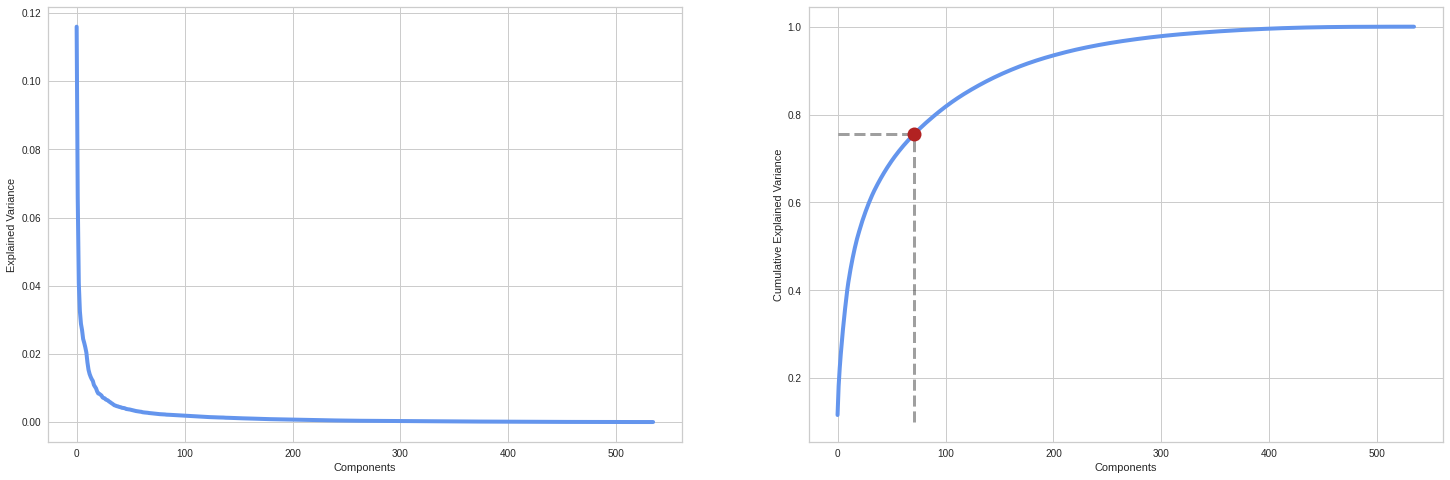

In [ ]:
plt.figure(figsize = (25,8))
plt.subplot(121) 

plt.plot(pca_df.explained_variance_ratio_, lw = 4, color = 'cornflowerblue')
plt.ylabel('Explained Variance')
plt.xlabel('Components')

plt.subplot(122)
plt.plot(np.cumsum(pca_df.explained_variance_ratio_), lw = 4 ,color = 'cornflowerblue')
plt.plot( [n_components_df, n_components_df],[0.1, np.cumsum(pca_df.explained_variance_ratio_)[n_components_df] ], 'k--', lw=3, alpha = .4)
plt.plot( [0, n_components_df],[np.cumsum(pca_df.explained_variance_ratio_)[n_components_df], np.cumsum(pca_df.explained_variance_ratio_)[n_components_df]  ], 'k--', lw=3 , alpha = .4)
plt.plot(n_components_df, np.cumsum(pca_df.explained_variance_ratio_)[n_components_df], marker="o", markersize=14, markerfacecolor="firebrick")
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
# Get the reduced dataframe of features
df_pca = pd.DataFrame(df_fit).iloc[: , :n_components_df+1]

# Add the track_id column 
df_pca = pd.concat([dataTracksFeatures_final['track_id'], df_pca], axis = 1)
df_pca.head()


,track_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,2,2.089639,-3.045967,-5.650315,0.084440,2.069036,-3.729588,-4.947949,-1.120743,-5.152544,-4.116152,3.549408,-1.235765,-2.158232,-1.672250,0.185359,0.366625,-1.084305,-1.615031,0.194701,1.782413,1.337597,-0.556396,-1.260252,-2.455168,-0.536698,0.413274,-3.070460,-0.036755,-1.749070,-0.527385,0.029052,0.792516,-1.110463,-0.716806,-0.631470,-0.884369,0.213433,1.882799,-0.928928,0.394216,1.258867,-2.344504,0.530492,1.022152,-1.562887,-1.286005,-0.169134,-0.222146,1.892619,0.599102,-0.233965,0.920195,0.606792,0.463282,1.192280,-1.428849,-1.731475,-0.013960,-1.401099,-0.468176,-1.257719,0.288806,0.363608,-0.398118,2.015044,-1.477019,0.193538,0.445054,0.438130,-0.557261,0.025770,-0.872744
1,3,3.530048,-5.348299,-4.413065,-1.098787,-3.091960,2.251010,-0.347202,4.700497,-0.662122,-3.464658,2.973698,0.082290,-0.904199,0.969659,-1.076771,-2.491102,0.132741,-0.521880,-1.952835,0.985976,-0.107192,-1.866689,-1.216823,-3.380117,-0.938338,0.330273,-2.511251,1.544235,-1.728226,0.509509,1.964277,-1.037056,0.345881,-0.344170,-1.395665,1.584329,-1.933094,2.579027,-1.773402,1.110431,0.515561,-0.469878,0.903818,1.745261,-0.466589,-0.111876,0.703805,0.050899,1.968388,0.383404,-1.859666,-0.334884,0.405560,-0.853971,-0.148102,-0.339610,-1.185256,0.660408,0.810521,-0.826030,-0.339907,0.381935,-0.626813,-0.009144,0.194661,0.729161,0.959964,-0.248503,-1.181580,0.190055,-2.074159,0.387167
2,5,0.978426,-3.135057,-3.577144,-0.923538,-1.194058,0.433373,-2.411106,1.189225,0.941566,-1.784749,2.793937,-2.409758,-0.746689,0.515818,0.074637,-0.513900,-1.268336,-1.012049,0.942393,2.630847,0.009035,-0.713545,-2.024130,-2.006455,1.468343,-2.964693,-2.343404,-1.660229,-2.390333,0.360843,-1.234679,1.521348,-0.598481,-1.589600,-0.720180,2.353794,-0.399164,0.942482,-2.166364,2.072838,0.571181,-0.716415,0.743050,0.746657,-0.515649,-1.028013,0.133494,-1.000931,2.177511,0.494487,-0.938087,2.016768,0.071118,-0.328603,1.915202,-2.986568,-1.711881,0.978527,0.382630,-0.472265,-1.732065,1.263867,-0.814475,-0.166006,0.463600,-0.354178,0.510877,1.152630,-0.762918,-1.296173,0.012477,0.409508
3,10,6.518353,1.505174,-4.892417,-0.959841,-2.096879,0.135356,0.144220,3.838594,0.277474,-3.020216,1.233359,0.908189,-0.541761,2.891418,2.389841,-1.912132,-1.553876,-0.420270,-1.537370,-0.126142,2.733577,-2.263133,-0.719119,-1.582020,7.230050,0.565573,-1.231148,0.413987,8.060082,0.639181,0.339656,2.411341,-0.785545,-0.175524,-0.445691,1.715167,-0.498644,2.491620,-0.010471,2.259523,-0.620694,0.027493,0.556746,-0.187152,-0.790031,-0.348930,-0.363724,-2.235339,-1.358504,3.956790,-0.853204,0.336446,-0.225949,-1.258752,1.631699,-1.130945,2.629414,-1.406132,-0.984953,1.427913,-1.667145,0.687170,-0.093592,-1.183611,-0.875172,-2.199130,1.603290,-0.001947,-0.775574,-0.042691,-1.773602,1.056192
4,20,0.868405,-1.132009,2.885325,-0.793801,-2.403536,4.545136,-0.241368,-1.771769,1.041883,-2.015914,-0.868716,-2.045896,1.243549,5.740358,0.281242,0.632306,1.995507,1.000996,0.559162,-1.312027,-1.730944,1.181392,0.329370,-0.373130,-0.658306,0.690223,1.442246,1.707254,-0.498095,-1.169145,0.354990,-1.820871,-1.151435,0.288227,-1.335550,0.082921,-2.068601,0.707737,-2.521945,-0.681012,1.682713,-1.153599,2.315361,-0.766597,0.258872,0.210116,-0.619511,-0.651568,-0.218256,0.645825,0.206416,0.981473,-0.262503,0.091728,-0.971332,-1.064960,-0.917196,0.958470,-0.147691,-1.219776,0.011137,-0.236358,-0.276763,-0.273308,-0.745959,-1.288759,1.046771,-1.042884,0.584056,0.143690,-0.628084,0.064478


**Cluster Analysis with K-Means++ and choose the optimal number of cluster**

Let's decide which is the best number of cluster for the dataset *df_pca*.
We evaluate that with the *Elbow Method*.


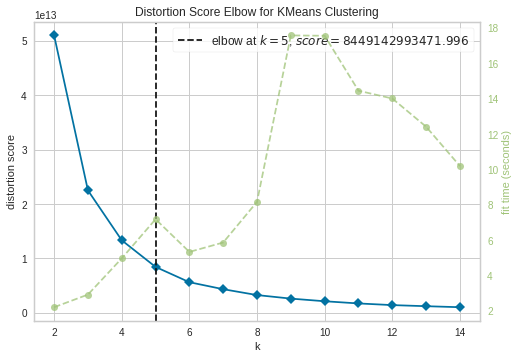

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Instantiate the clustering model and visualizer

visualizer = KElbowVisualizer(KMeans(n_clusters=12, init='k-means++').fit(df_pca), k=(2,15))
visualizer.fit(df_pca);      # Fit the data to the visualizer
visualizer.show();


We choose 5 clusters and apply k-means++.
Now we can compute the Adjusted Rand Index to check the accuracy of the cluster analysis.

In [ ]:
kmeans_df_pca = KMeans(n_clusters=5, init='k-means++',random_state=42).fit(df_pca)

cluster = kmeans_df_pca.labels_
index_NA = dataTracksFeatures.loc[pd.isna(dataTracksFeatures["track_genre_top_x"]), :].index
clusters = [cluster[i]  for i in range(len(cluster)) if not i in index_NA ]
genre_track = dataTracksFeatures['track_genre_top_x'].dropna()
dummies = pd.get_dummies(genre_track)
numeric_genre_track = dummies.values.argmax(axis = 1)
ari = round(metrics.rand_score(numeric_genre_track, clusters)*100,2)
print('The goodness of our classification is about {}%.'.format(ari))


The goodness of our classification is about 60.94%.


**Characterize your clusters**

In [ ]:
special_pivot = SpecialPivot(dataTracksFeatures, clusters)

In [ ]:
special_pivot.head()

,Clusters,track_bit_rate,track_duration_x,track_genre_top_x,track_language_code_y,track_location_x
0,2,2,2,Hip-Hop,en,oth
1,2,2,3,Hip-Hop,en,oth
2,2,2,2,Hip-Hop,en,oth
3,2,1,2,Pop,en,
4,2,2,4,,en,oth


In [ ]:
pivot_specialPivot_Bitrate = SPecialPivotBitrate(special_pivot)
pivot_specialPivot_Bitrate

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Low,26.88,13.36,39.20,27.78,21.08
Medium-Low,27.66,13.88,40.45,18.66,23.92
Medium-High,45.06,72.21,20.14,52.64,54.73
High,0.41,0.55,0.21,0.92,0.28
Tot,100.01,100.00,100.00,100.00,100.01


Bit-rate tells us how many bits of data are processed every second. It is mostly *medium high* in all clusters excepts for cluster 3 which has *low*-*medium-low* bit rate.

In [ ]:
pivot_specialPivot_Duration = SPecialPivotDuration(special_pivot)
pivot_specialPivot_Duration 

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Low,25.63,20.66,29.28,24.66,25.45
Medium-Low,23.75,24.98,26.46,24.84,25.00
Medium-High,24.20,26.29,22.28,26.54,25.33
High,26.43,28.08,21.98,23.96,24.22
Tot,100.01,100.01,100.00,100.00,100.00


We can see that the duration of the songs is a fairly uniform value. Except in cluster 3 where it tends to decrease.

In [ ]:
pivot_specialPivot_Language = SpecialPivotLanguage(special_pivot)
pivot_specialPivot_Language

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Spanish,0.22,0.32,70.45,0.47,0.21
Other,0.35,0.00,0.51,0.00,0.12
English,99.04,99.50,27.48,99.26,99.33
French,0.19,0.03,1.14,0.25,0.21
Tot,100.00,100.00,99.99,99.99,100.01


As before the most commonly used language is English. In cluster 3, on the other hand, Spanish stands out as the most used language. This could also be due to the fact that some songwriters may be Spanish but live in the united states and tend to turn English into Spanish. Let's remember that the United States has over 41 million people aged five or older who speak Spanish at home. So it may make sense.

In [ ]:
pivot_specialPivot_Location = SpecialPivotLocation(special_pivot)
pivot_specialPivot_Location

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Other,62.89,58.43,56.98,61.20,64.92
"Brooklyn, NY",33.08,34.57,37.31,35.19,30.63
"New York, NY",0.94,1.08,1.55,1.32,0.86
France,2.14,0.90,3.46,1.82,2.75
Tot,100.00,100.01,99.99,100.01,100.00


It is normal that other is the category with the most songs, after all, we are considering the whole world, but the places that stand out the most in terms of new song development are: Broolkyn, New York and France. It is to be observed that the whole New York has more songs than the whole France.

In [ ]:
pivot_specialPivot_Genre = SpecialPivotGenre(special_pivot)
pivot_specialPivot_Genre

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Hip-Hop,2.91,2.68,3.43,4.16,3.51
Pop,2.41,1.69,2.54,2.69,1.64
Rock,14.03,10.27,19.71,9.27,13.88
Experimental,11.86,7.26,11.20,9.86,9.75
Folk,2.07,2.51,4.09,2.19,2.41
Jazz,0.56,0.20,1.34,0.05,0.61
Electronic,8.34,7.72,10.72,7.48,9.92
Spoken,0.57,0.27,0.79,0.28,0.11
International,2.03,1.24,1.57,1.09,0.61
Soul-RnB,0.11,0.03,0.34,0.18,0.18


In this new context what strikes one immediately is the proximity of values between Rock and Experimental, immediately afterwards we have again Electronic.

Some observations:


*   Most relevant genres are Rock, Instrumental, Experimental and Electronic, exactly as before.
*   Even if they have no influence in our clustering Listening, BluesCountry, Classical, Easy, Spoken they are more present.




# **3. Algorithmic questions**


Given a list of integers A, and another fixed integer s we need to implement an algorithm that outputs all the possible pairs in A whose sum is equal to s.

Let's see our algorithm to find pairs:

In [ ]:
def find_values_equal_s(A, s):
  myPairs = []
  for pair in itertools.combinations(A,2): # make all possibile combination
    if (not pair in myPairs) and (not tuple(reversed(pair)) in myPairs) and (s == pair[0] + pair[1]): #check if (x,y) and (y,x) are not on my list
      myPairs.append(pair)
  if len(myPairs) > 0:
      print(myPairs)
  else:
      print("There isn't any pairs whose sum is equal to", s)

In [ ]:
A = [3,-3,3,-3]
s = 3

find_values_equal_s(A,s)

There isn't any pairs whose sum is equal to 3


In [ ]:
A = [3,-3,3,-3]
s = 0

find_values_equal_s(A,s)

[(3, -3)]


In [ ]:
A = [7,-2,8,2,6,4,-7,2,1,3,-3]
s = 17

find_values_equal_s(A,s)

There isn't any pairs whose sum is equal to 17


In [ ]:
A = [7,-2,8,2,6,4,-7,2,1,3,-3]
s = 6

find_values_equal_s(A,s)

[(-2, 8), (2, 4)]
